# Libraries

In [0]:
from fastai.vision import *

In [2]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Classes

In [0]:
classes = ['eagle','hawk','kestrel', 'vulture']

In [0]:
path = Path('gdrive/My Drive/Colab Notebooks/raptors/data')


## Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['eagle', 'hawk', 'kestrel', 'vulture']

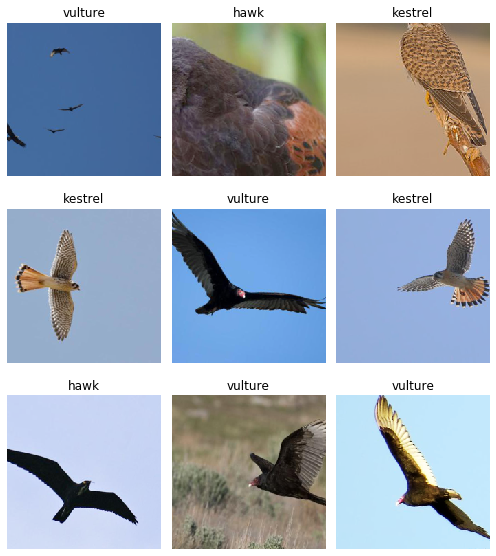

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['eagle', 'hawk', 'kestrel', 'vulture'], 4, 443, 110)

# Train model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.173620,1.173593,0.390909,01:09
1,1.515918,1.017172,0.290909,00:09
2,1.191667,0.921989,0.318182,00:07
3,1.053662,0.893762,0.309091,00:07


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.570004,0.956352,0.309091,00:07
1,0.532198,1.273484,0.318182,00:07
2,0.501757,1.242873,0.345455,00:07
3,0.480792,1.230250,0.318182,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


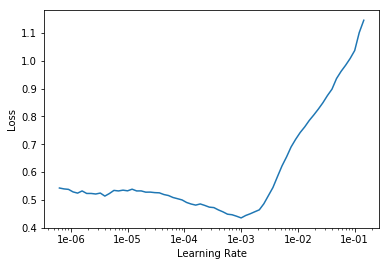

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.541904,0.972693,0.368056,00:09
1,0.460373,0.948528,0.361111,00:09


In [0]:
learn.save('stage-2')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

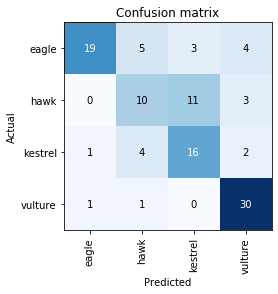

In [14]:
interp.plot_confusion_matrix()

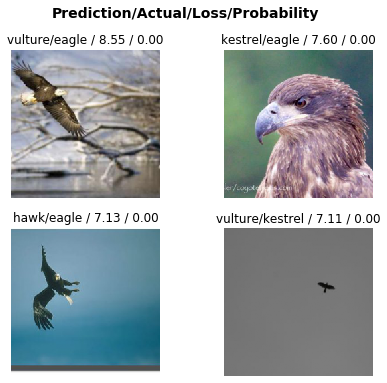

In [18]:
interp.plot_top_losses(4,figsize=(7, 6))

# Clean up